# Case study on Supervised learning

In [77]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Read the dataset to the python environment

In [78]:
df=pd.read_excel('iris.xls')

In [79]:
df.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [80]:
df.describe(include='all')

,SL,SW,PL,PW,Classification
count,143.000000,144.000000,144.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,Iris-virginica
freq,NaN,NaN,NaN,NaN,50
mean,5.855944,3.049306,3.756250,1.198667,NaN
std,0.828168,0.430644,1.761306,0.763161,NaN
min,4.300000,2.000000,1.000000,0.100000,NaN
25%,5.100000,2.800000,1.600000,0.300000,NaN
50%,5.800000,3.000000,4.350000,1.300000,NaN
75%,6.400000,3.300000,5.100000,1.800000,NaN


In [81]:
df.shape

(150, 5)

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


# 2. Do necessary pre-processing steps.

# lets do label encoding on classification feature

In [83]:
# lets do label encoding on classification feature
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
df['Classification']=label_encoder.fit_transform(df['Classification'])


In [84]:
df.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,NaN,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [85]:
df['Classification'].value_counts()

0    50
1    50
2    50
Name: Classification, dtype: int64

# Handling Missing Values

In [86]:

df.isna().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

There are some missing values in features SL,SW,PL

Let us fill missing values using KNN imputer

#before we proceed to fill using missing values, we need to scale our data. Let us use MInMax scaler to scale the values between 0 and 1

# Scaling the data

Let us split dependent variable and independent variable.

In [87]:
x=df.drop(['Classification'],axis=1)
y=df['Classification']

In [88]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
df=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)

In [89]:
x

,SL,SW,PL,PW
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,NaN,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,NaN,2.0
148,6.2,3.4,5.4,2.3


Let us proceed to impute the missing values using KNNImputer, as ur data has been normalized and our classification has been encoded too

In [91]:
from sklearn.impute import KNNImputer

In [92]:
Knn=KNNImputer(n_neighbors=5)

In [93]:
x=pd.DataFrame(Knn.fit_transform(x),columns=x.columns)

In [94]:
#let us recheck if there is any missing value
x.isna().sum()

SL    0
SW    0
PL    0
PW    0
dtype: int64

There are no missing values in our data.

# checking outlier

In [95]:
#let us check outlier on three numerical features
outlier_detection=x[['SL','SW','PL','PW']]

In [96]:
outlier_detection

,SL,SW,PL,PW
0,5.10,3.5,1.4,0.2
1,4.90,3.0,1.4,0.2
2,4.68,3.2,1.3,0.2
3,4.60,3.1,1.5,0.2
4,5.00,3.6,1.4,0.2
...,...,...,...,...
145,6.70,3.0,5.2,2.3
146,6.30,2.5,5.0,1.9
147,6.50,3.0,5.5,2.0
148,6.20,3.4,5.4,2.3


In [97]:
def IQR_values(dataframe,column_name):
    q1=dataframe[column_name].quantile(0.25)
    q2=dataframe[column_name].quantile(0.50)
    q3=dataframe[column_name].quantile(0.75)
    IQR=q3-q1
    lower_limit=q1-1.5*IQR
    upper_limit=q3+1.5*IQR
    return lower_limit,upper_limit

outlier={}
for i in outlier_detection:
    lower_limit,upper_limit=IQR_values(outlier_detection,i)
    outlier[i]=[lower_limit,upper_limit]


In [98]:
outlier

{'SL': [3.1624999999999983, 8.342500000000001],
 'SW': [2.05, 4.05],
 'PL': [-3.649999999999999, 10.349999999999998],
 'PW': [-1.95, 4.05]}

In [99]:
SL_outlier=(x['SL']<outlier['SL'][0])|(x['SL']>outlier['SL'][1])#lets check outlier on SL

In [100]:
x.loc[SL_outlier].index

Int64Index([], dtype='int64')

There are no outliers in SL feature

In [101]:
SW_outlier=(x['SW']<outlier['SW'][0])|(x['SW']>outlier['SW'][1])#checking outlier on SW

In [102]:
df.loc[SW_outlier].index

Int64Index([15, 32, 33, 60], dtype='int64')

There are three outliers in SW feature, thus we need to drop these values

In [103]:
df.drop([15, 32, 33, 60],inplace=True)

We have removed outlier from the SW feature

In [104]:
PL_outlier=(x['PL']<outlier['PL'][0])|(x['PL']>outlier['PL'][1])#checking outlier on pl

In [105]:
df.loc[PL_outlier].index

Int64Index([], dtype='int64')

There are no outliers in PL feature.

In [106]:
PW_outlier=(x['PW']<outlier['PW'][0])|(x['PW']>outlier['PW'][1])#checking outlier on pw

In [107]:
df.loc[PW_outlier].index

Int64Index([], dtype='int64')

There are no outliers in PW feature. 

We have scaled our data, filled missing values and handled outliers too. Now, we are good to proceed with the supervised machine learning algorithm

# 3.Find out which classification model gives the best result to predict iris species.(also do random forest algorithm)

Before we proceed to implement any machine learning algorithm, let us split our dataset into train and test

In [108]:
from sklearn.model_selection import train_test_split

In [109]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.20)

In [110]:
y_train.value_counts()

1    41
0    40
2    39
Name: Classification, dtype: int64

In [111]:
print('X-train shape is :',x_train.shape,'Y-train shape is :',y_train.shape,'X-test shape is:',x_test.shape,'Y-test shape is :',y_test.shape, sep=' ',end='\n')

X-train shape is : (120, 4) Y-train shape is : (120,) X-test shape is: (30, 4) Y-test shape is : (30,)


# Decision Tree Algorithm

In [112]:
#importing decision tree
from sklearn.tree import DecisionTreeClassifier
decision_tree=DecisionTreeClassifier()

In [113]:
decision_tree.fit(x_train,y_train)

DecisionTreeClassifier()

In [114]:
decision_tree_pred=decision_tree.predict(x_test)

In [115]:
y_test

73     1
18     0
118    2
78     1
76     1
31     0
64     1
141    2
68     1
82     1
110    2
12     0
36     0
9      0
19     0
56     1
104    2
69     1
55     1
132    2
29     0
127    2
26     0
128    2
131    2
145    2
108    2
143    2
45     0
30     0
Name: Classification, dtype: int32

In [116]:
decision_tree_pred


array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

In [117]:
#let us import metrics to check our predictions
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix

In [118]:
print("Accuracy is: ",accuracy_score(y_test,decision_tree_pred,))

Accuracy is:  1.0


In [119]:
print('Recall score is: ',recall_score(y_test,decision_tree_pred,average='micro'))
print('precision score is: ',precision_score(y_test,decision_tree_pred,average='micro'))


Recall score is:  1.0
precision score is:  1.0


In [120]:
from sklearn.metrics import classification_report
classification_report(y_test, decision_tree_pred)

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00        10\n           1       1.00      1.00      1.00         9\n           2       1.00      1.00      1.00        11\n\n    accuracy                           1.00        30\n   macro avg       1.00      1.00      1.00        30\nweighted avg       1.00      1.00      1.00        30\n'

In [121]:
print('f1 score is:',f1_score(y_test,decision_tree_pred,average='micro'))

f1 score is: 1.0


In [122]:
#create confusion matrix
cm=confusion_matrix(y_test,decision_tree_pred)

In [123]:
# Creating a dataframe for a array-formatted Confusion matrix, for plotting confusion matrix
cm_df = pd.DataFrame(cm,index = ['SETOSA','VERSICOLR','VIRGINICA'],columns = ['SETOSA','VERSICOLR','VIRGINICA'])

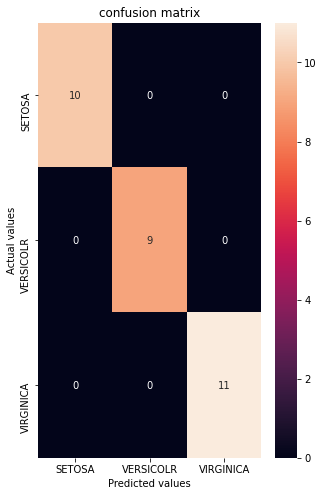

In [124]:
plt.figure(figsize=(5,8))
sns.heatmap(cm_df,annot=True)
plt.title('confusion matrix')
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.show()

We can see that the precision, recall,f1-score value is 1 for the decision tree. This model is an over fitting model, we have to reject it. 

We can depict the TP,TN,FP,FN from the above confusion matrix.
let us find these values for class 'setosa'.
we can find :-

TP (the true positive is where the actual value and the predicted value are the same)
TP=10 (cell1)

TN (the true negative value for a class will be the sum of all columns and rows except the values of the class that we are calculating)
TN=9+0+0+11 (cell5+cell6+cell8+cell9)
TN=20

FP (the false positive value for a class will be the sum of values of corresponding columns except for the TP values.)
FP=0+0 (cell4+cell7)
FP=0

FN(the false negative value for a class will be the sum of values of corresponding rows except for the TP values)
FN=0+0 (cell2+cell3)
FN=0

# SVM

In [125]:
#importing SVM using Radial basis function kernel
from sklearn.svm import SVC
svm_radial=SVC(kernel='rbf')

In [126]:
svm_radial.fit(x_train,y_train)

SVC()

In [127]:
svm_radial_pred=svm_radial.predict(x_test)

In [128]:
classification_report(y_test,svm_radial_pred)

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00        10\n           1       1.00      1.00      1.00         9\n           2       1.00      1.00      1.00        11\n\n    accuracy                           1.00        30\n   macro avg       1.00      1.00      1.00        30\nweighted avg       1.00      1.00      1.00        30\n'

In [129]:
print('Accuracy for SVM radial basis function is:',accuracy_score(y_test,svm_radial_pred))
print('Recall value for SVM radial basis function is: ',recall_score(y_test,svm_radial_pred,average='micro'))
print('precision value for SVM radial basis function is: ',precision_score(y_test,svm_radial_pred,average='micro'))
print('f1 score for SVM radial basis function is: ',f1_score(y_test,svm_radial_pred,average='micro'))

Accuracy for SVM radial basis function is: 1.0
Recall value for SVM radial basis function is:  1.0
precision value for SVM radial basis function is:  1.0
f1 score for SVM radial basis function is:  1.0


In [130]:
#let us use linear kernel
svm_linear=SVC(kernel='linear')

In [131]:
svm_linear.fit(x_train,y_train)

SVC(kernel='linear')

In [132]:
svm_linear_pred=svm_linear.predict(x_test)

In [133]:
classification_report(y_test,svm_linear_pred)

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00        10\n           1       1.00      1.00      1.00         9\n           2       1.00      1.00      1.00        11\n\n    accuracy                           1.00        30\n   macro avg       1.00      1.00      1.00        30\nweighted avg       1.00      1.00      1.00        30\n'

In [134]:
print('Accuracy for SVM linear is:',accuracy_score(y_test,svm_linear_pred))
print('Recall value for SVM linear is: ',recall_score(y_test,svm_linear_pred,average='micro'))
print('precision value for SVM linear is: ',precision_score(y_test,svm_linear_pred,average='micro'))
print('f1 score for SVM linear is: ',f1_score(y_test,svm_linear_pred,average='micro'))

Accuracy for SVM linear is: 1.0
Recall value for SVM linear is:  1.0
precision value for SVM linear is:  1.0
f1 score for SVM linear is:  1.0


In [135]:
#let us use polynomial kernel
svm_poly=SVC(kernel='poly',degree=5)

In [136]:
svm_poly.fit(x_train,y_train)

SVC(degree=5, kernel='poly')

In [137]:
svm_poly_pred=svm_poly.predict(x_test)

In [138]:
classification_report(y_test,svm_poly_pred)

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00        10\n           1       0.89      0.89      0.89         9\n           2       0.91      0.91      0.91        11\n\n    accuracy                           0.93        30\n   macro avg       0.93      0.93      0.93        30\nweighted avg       0.93      0.93      0.93        30\n'

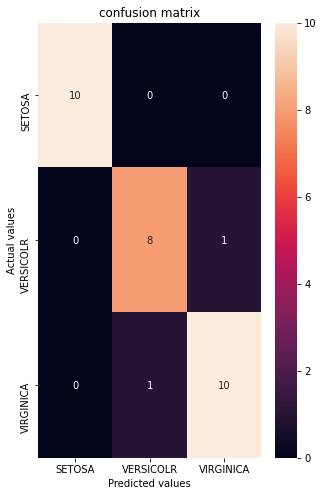

In [139]:
#create confusion matrix
cm=confusion_matrix(y_test,svm_poly_pred)
# Creating a dataframe for a array-formatted Confusion matrix, for plotting confusion matrix
cm_df = pd.DataFrame(cm,index = ['SETOSA','VERSICOLR','VIRGINICA'],columns = ['SETOSA','VERSICOLR','VIRGINICA'])
plt.figure(figsize=(5,8))
sns.heatmap(cm_df,annot=True)
plt.title('confusion matrix')
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.show()

In [140]:
print('Accuracy for SVM polynomial is:',accuracy_score(y_test,svm_poly_pred))
print('Recall value for SVM polynomial is: ',recall_score(y_test,svm_poly_pred,average='micro'))
print('precision value for SVM polynomial is: ',precision_score(y_test,svm_poly_pred,average='micro'))
print('f1 score for SVM polynomial is: ',f1_score(y_test,svm_poly_pred,average='micro'))

Accuracy for SVM polynomial is: 0.9333333333333333
Recall value for SVM polynomial is:  0.9333333333333333
precision value for SVM polynomial is:  0.9333333333333333
f1 score for SVM polynomial is:  0.9333333333333333


From the above three kernels, we can see that SVM polynomial based kernel gives the best model, whereas other models overfits our data. Hence, we can use SVM polynomial.

Let us implement random forest as well

# Random Forest

In [141]:
#importing Randome Forest
from sklearn.ensemble import RandomForestClassifier

In [142]:
rf=RandomForestClassifier()
rf.fit(x_train,y_train)

RandomForestClassifier()

In [143]:
rf_pred=rf.predict(x_test)

In [144]:
#let us check our model accuracy, precision, recall
classification_report(y_test,rf_pred)

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00        10\n           1       1.00      1.00      1.00         9\n           2       1.00      1.00      1.00        11\n\n    accuracy                           1.00        30\n   macro avg       1.00      1.00      1.00        30\nweighted avg       1.00      1.00      1.00        30\n'

In [145]:
print('Accuracy for Random Forest is:',accuracy_score(y_test,rf_pred))
print('Recall value for Random Forest is: ',recall_score(y_test,rf_pred,average='micro'))
print('precision value for Random Forest is: ',precision_score(y_test,rf_pred,average='micro'))
print('f1 score for Random Forest is: ',f1_score(y_test,rf_pred,average='micro'))

Accuracy for Random Forest is: 1.0
Recall value for Random Forest is:  1.0
precision value for Random Forest is:  1.0
f1 score for Random Forest is:  1.0


Our Random Forest model is over fitting our data.
Let us do some hyper parameter tunning and see how it works

In [146]:
rf_tune=RandomForestClassifier(n_estimators=5, criterion='entropy',max_depth=10,min_samples_split=5)

In [147]:
rf_tune.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=10, min_samples_split=5,
                       n_estimators=5)

In [148]:
rf_tune_pred=rf_tune.predict(x_test)

In [149]:
#let us check our model accuracy, precision, recall
classification_report(y_test,rf_tune_pred)

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00        10\n           1       1.00      1.00      1.00         9\n           2       1.00      1.00      1.00        11\n\n    accuracy                           1.00        30\n   macro avg       1.00      1.00      1.00        30\nweighted avg       1.00      1.00      1.00        30\n'

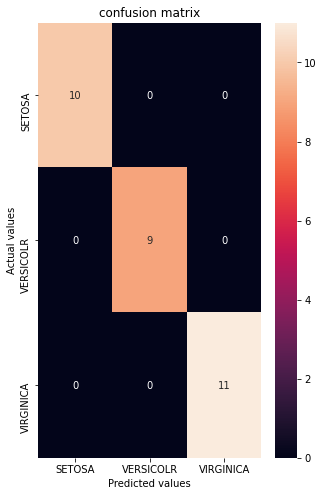

In [150]:
#create confusion matrix
cm=confusion_matrix(y_test,rf_tune_pred)
# Creating a dataframe for a array-formatted Confusion matrix, for plotting confusion matrix
cm_df = pd.DataFrame(cm,index = ['SETOSA','VERSICOLR','VIRGINICA'],columns = ['SETOSA','VERSICOLR','VIRGINICA'])
plt.figure(figsize=(5,8))
sns.heatmap(cm_df,annot=True)
plt.title('confusion matrix')
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.show()

In [151]:
print('Accuracy for Random Forest is:',accuracy_score(y_test,rf_tune_pred))
print('Recall value for Random Forest is: ',recall_score(y_test,rf_tune_pred,average='weighted'))
print('precision value for Random Forest is: ',precision_score(y_test,rf_tune_pred,average='weighted'))
print('f1 score for Random Forest is: ',f1_score(y_test,rf_tune_pred,average='weighted'))

Accuracy for Random Forest is: 1.0
Recall value for Random Forest is:  1.0
precision value for Random Forest is:  1.0
f1 score for Random Forest is:  1.0


After we have done some hyper parameter tunning our model got improved, we can see the result above.

From the above machine algorithms, we can choose Random Forest, it gives the best model after hyperparameter tunning. We can see that the accuracy,precision,recall and f1 score are same which is 0.96. Though, we got an accuracy of 0.93 from SVM polynomial alorithm too but random forest has more precision, accuracy. Rest of the models overfits, but we can do some hyper parameter tunning and make our model perfect. 


We can choose RandomForest Algorithm to implement on our dataset. 